In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

plt.rcParams['figure.dpi'] = 85
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.title_fontsize'] = 16
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 4.32
plt.rcParams['ytick.minor.size'] = 2.46
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['ytick.minor.width'] = 1.2

# Figure 3: Plot the bias relations
### Define some global variables

In [2]:
home = '/oak/stanford/orgs/kipac/users/mahlet/bias/'

In [3]:
z_array = [0, 0.5, 1, 1.5]

cmap_red = plt.get_cmap('Reds')(np.linspace(0.333, 0.999, 4))
cmap_blue = plt.get_cmap('Blues')(np.linspace(0.333, 0.999, 4))
cmap_total = plt.get_cmap('Purples')(np.linspace(0.333, 0.999, 4))
color_red = cmap_red[1]
color_blue = cmap_blue[1]
color_total = cmap_total[1] 

In [4]:
Lbox = 205

### Define some functions

In [5]:
def error(hodtype, z, color, density, AB = ''):

    invmats = np.load(home + 'data/'+AB+'mpiinvmat_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z, color, density))
    nbar = np.load(home + 'data/'+AB+'mpinbar_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z,color, density))
    covvals = invmats.real[k1_idx]/nbar/Lbox**3  # divided by 2pi/dk is the same as times dx

    return np.sqrt(np.diag(covvals))

In [6]:
def b1(b1_L):
    return 1+b1_L # eq B.4 in lazeyras et al
    
def b2(b1):
    return 0.412 - 2.143*b1 + 0.929*b1**2 + 0.008*b1**3 # eq 5.2 in lazeyras et al
    
def b2_L(b2, b1_L):
    return (b2 - 8/21*b1_L)/2 # eq B.5 in lazeyras et al
    
def bs2_L(bs2, b1_L): # the so-called Lagrangian local-in-matter-density (LLIMD) prediction
    return bs2 + 2/7*b1_L

def b3(b1):
    return -1.028 + 7.646*b1 - 6.227*b1**2 + 0.912*b1**3 # eq 5.3 in lazeyras et al

def b3_L(b1_L, b2_L):
    return (b3(b1(b1_L))+796/1323*b1_L+13/7*2*b2_L)/6 # eq B.6 in lazeyras et al

In [7]:
def b2_L_z(b1_L):
    return 0.01677*b1_L**3 - 0.005116*b1_L**2 + 0.4279*b1_L - 0.1635 # table 3 in zennaro et al

def bs2(b1):
    return -2/7*(b1-1) # Fig 7 in lazeyras et al

def bs2_L_z(b1_L):
    return -0.3605*b1_L**3 + 0.5649*b1_L**2 - 0.1412*b1_L - 0.01318 # table 3 in zennaro et al

def b2_tng(b1):
    return 0.30 - 0.79*b1 + 0.20*b1**2 + 0.12*b1**3 # eq 3.8 in barreira et al

def bs2_tng(b1):
    return 0.66 - 0.57*b1 # eq 3.8 in barreira et al

def bnabla_L(b1_L):
    return 0.2298*b1_L**3 - 2.096*b1_L**2 + 0.7816*b1_L - 0.1545 # table 3 in zennaro et al

def b2_L_z_halo(b1_L):
    return -0.09143*b1_L**3 + 0.7093*b1_L**2 - 0.2607*b1_L - 0.3469 # table 3 in zennaro et al

def bs2_L_z_halo(b1_L):
    return 0.02278*b1_L**3 - 0.005503*b1_L**2 - 0.5904*b1_L - 0.1174 # table 3 in zennaro et al

### Plot with error bars

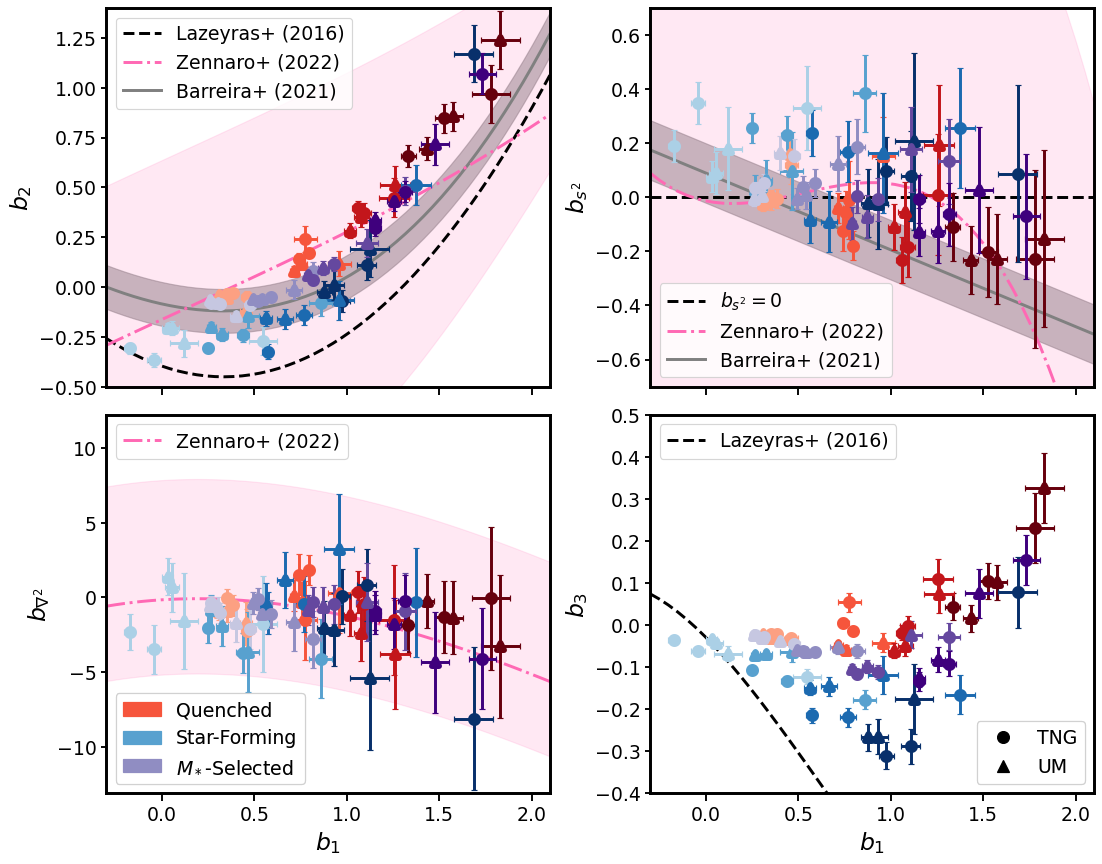

In [8]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', '$M_*$-Selected']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
colors_cmap_patch = [color_red, color_blue, color_total] 
cmap_patch = [cmap_red, cmap_blue, cmap_total]

plt.figure(figsize = (15,12))
grid = gridspec.GridSpec(2, 2)
grid.update(wspace = 0.225, hspace = 0.075) 

color_zennaro = 'hotpink' 
color_barreira = 'grey' 
ylabel = ['$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
xlim = -0.3, 2.1 
b1_L_fit = np.linspace(xlim[0], xlim[1])
b1_fit = b1(b1_L_fit)
b2_L_fit = b2_L(b2(b1_fit), b1_L_fit)
sigma = 0.22

y_dict = dict()
for i, ylim in zip(range(len(ylabel)), [(-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)]):

    x_array, y_dict[ylabel[i]] = [], []
    grid0 = plt.subplot(grid[i])
    if i == 0:
        grid0.plot(b1_L_fit, b2_L_fit, linestyle = '--', color = 'black', linewidth = 2.5)
        y = b2_L(b2_tng(b1_fit), b1_L_fit)
        grid0.plot(b1_L_fit, y, linestyle = '-', color = color_barreira, linewidth = 2.5) 
        grid0.plot(b1_L_fit, b2_L_z(b1_L_fit), linestyle = '-.', color = color_zennaro, linewidth = 2.5)
        grid0.fill_between(b1_L_fit, y-sigma/2, y+sigma/2, color = color_barreira, alpha = 0.5) 
        grid0.fill_between(b1_L_fit, b2_L_z_halo(b1_L_fit)-0.8, b2_L_z(b1_L_fit)+0.8, color = color_zennaro, alpha = 0.15)
    if i == 1:
        grid0.plot(b1_L_fit, bs2_L(bs2(b1_fit), b1_L_fit), linestyle = '--', color = 'black', linewidth = 2.5) 
        y = bs2_L(bs2_tng(b1_fit), b1_L_fit)
        grid0.plot(b1_L_fit, y, linestyle = '-', color = color_barreira, linewidth = 2.5)
        grid0.plot(b1_L_fit, bs2_L_z(b1_L_fit), linestyle = '-.', color = color_zennaro, linewidth = 2.5) 
        grid0.fill_between(b1_L_fit, y-sigma/2, y+sigma/2, color = color_barreira, alpha = 0.5)
        grid0.fill_between(b1_L_fit, bs2_L_z_halo(b1_L_fit)-1, bs2_L_z(b1_L_fit)+1.5, color = color_zennaro, alpha = 0.15)
    if i == 2:
        grid0.plot(b1_L_fit, bnabla_L(b1_L_fit), linestyle = '-.', color = color_zennaro, linewidth = 2.5) 
        grid0.fill_between(b1_L_fit, bnabla_L(b1_L_fit)-5, bnabla_L(b1_L_fit)+8, color = color_zennaro, alpha = 0.15)
    if i == 3:
        grid0.plot(b1_L_fit, b3_L(b1_L_fit, b2_L_fit), linestyle = '--', color = 'black', linewidth = 2.5)
                
    for color, plot_color, title in zip(['red', 'blue', 'total'], cmap_patch, labels):        
        for hodtype, marker in zip(hodtypes, ['o','^']):
            for density, label in zip(['low', 'high', 'medium'], [hodtype+', '+title, None, None]):

                for z, j in zip(z_array, range(len(z_array))):
                    
                    biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')                        

                    x = biasval[:,0][k1_idx]
                    y = biasval[:,i+1][k1_idx]
                    err = error(hodtype, z, color, density)

                    grid0.scatter(x, y, color = plot_color[j], marker = marker, 
                              linewidth = 5, zorder = 3) 
                    grid0.errorbar(x, y, xerr = err[0], yerr = err[i+1], 
                               color = plot_color[j], fmt = '.', elinewidth = 2.5, capsize = 2.5)
                    x_array.append(x)
                    y_dict[ylabel[i]].append(y)
                        
                grid0.set_ylabel(ylabel[i])
                grid0.set_xlim(np.array(xlim))
                grid0.set_ylim(np.array(ylim))
        
    if i == 1:
        custom_lines = [Line2D([0], [0], color = 'black', linewidth = 2.5, linestyle = '--'),
                    Line2D([0], [0], color = color_zennaro, linewidth = 2.5, linestyle = '-.'),
                    Line2D([0], [0], color = color_barreira, linewidth = 2.5, linestyle = '-')]
        grid0.legend(custom_lines, [r'$b_{s^2}=0$', 'Zennaro+ (2022)', 'Barreira+ (2021)'], loc = 'lower left') 
    elif i == 2:
        second_legend = grid0.legend([Line2D([0], [0], color = color_zennaro, linewidth = 2.5, linestyle = '-.')], ['Zennaro+ (2022)'], loc = 'upper left')
        grid0.add_artist(second_legend)
        
        patch = [mpatches.Patch(color=colors_cmap_patch[i], label=labels[i]) for i in range(len(labels))]
        first_legend = grid0.legend(handles=patch, loc = 'lower left')
        grid0.add_artist(first_legend)
    elif i == 0:
        custom_lines = [Line2D([0], [0], color = 'black', linewidth = 2.5, linestyle = '--'),
                    Line2D([0], [0], color = color_zennaro, linewidth = 2.5, linestyle = '-.'),
                    Line2D([0], [0], color = color_barreira, linewidth = 2.5, linestyle = '-')]
        grid0.legend(custom_lines, ['Lazeyras+ (2016)', 'Zennaro+ (2022)', 'Barreira+ (2021)'], loc = 'upper left')        
    elif i == 3:
        first_legend = grid0.legend([Line2D([0], [0], color = 'black', linewidth = 2.5, linestyle = '--')], ['Lazeyras+ (2016)'], loc = 'upper left')
        grid0.add_artist(first_legend)

        custom_lines = [Line2D([0], [0], color = 'black', markersize = 10, marker = 'o', linestyle = 'None'), 
                        Line2D([0], [0], color = 'black', markersize = 10, marker = '^', linestyle = 'None')]
        second_legend = grid0.legend(custom_lines, hodtypes, loc = 'lower right')
        grid0.add_artist(second_legend)
    if i<2:
        grid0.set_xticklabels([])
    else:
        grid0.set_xlabel('$b_1$')

plt.savefig(home+'figures/Figure3.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

### Figure out the outliers

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4792/3263723659.py:3: SyntaxWarning: invalid escape sequence '\s'
  labels = ['Quenched', 'Star-Forming', 'M$\star$-Selected']


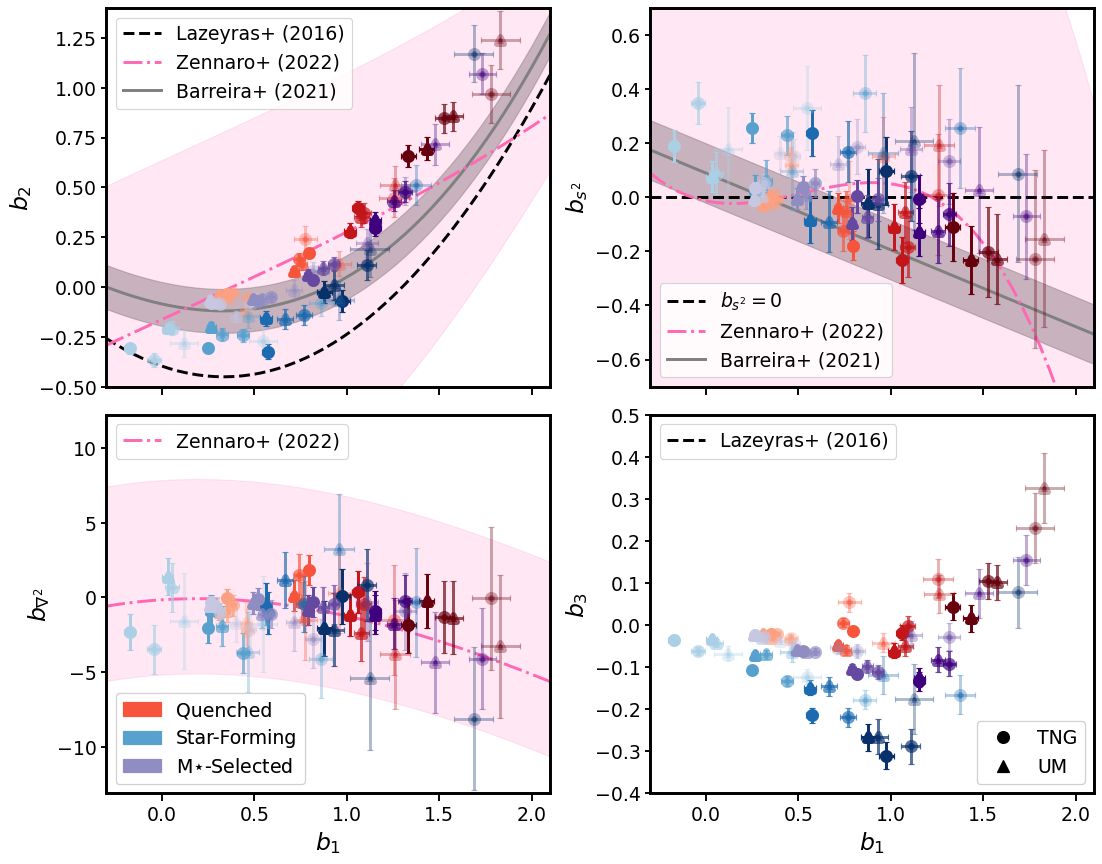

In [9]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', 'M$\star$-Selected']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
colors_cmap_patch = [color_red, color_blue, color_total] 
cmap_patch = [cmap_red, cmap_blue, cmap_total]

plt.figure(figsize = (15,12))
grid = gridspec.GridSpec(2, 2)
grid.update(wspace = 0.225, hspace = 0.075)

color_zennaro = 'hotpink' 
color_barreira = 'grey' 
ylabel = ['$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
xlim = -0.3, 2.1
b1_L_fit = np.linspace(xlim[0], xlim[1])
b1_fit = b1(b1_L_fit)
b2_L_fit = b2_L(b2(b1_fit), b1_L_fit)
sigma = 0.22

y_dict = dict()
for i, ylim in zip(range(len(ylabel)), [(-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)]):

    grid0 = plt.subplot(grid[i])
    if i == 0:
        grid0.plot(b1_L_fit, b2_L_fit, linestyle = '--', color = 'black', linewidth = 2.5)
        y = b2_L(b2_tng(b1_fit), b1_L_fit)
        grid0.plot(b1_L_fit, y, linestyle = '-', color = color_barreira, linewidth = 2.5) 
        grid0.plot(b1_L_fit, b2_L_z(b1_L_fit), linestyle = '-.', color = color_zennaro, linewidth = 2.5)
        grid0.fill_between(b1_L_fit, y-sigma/2, y+sigma/2, color = color_barreira, alpha = 0.5) 
        grid0.fill_between(b1_L_fit, b2_L_z_halo(b1_L_fit)-0.8, b2_L_z(b1_L_fit)+0.8, color = color_zennaro, alpha = 0.15)
    if i == 1:
        grid0.plot(b1_L_fit, bs2_L(bs2(b1_fit), b1_L_fit), linestyle = '--', color = 'black', linewidth = 2.5) 
        y = bs2_L(bs2_tng(b1_fit), b1_L_fit)
        grid0.plot(b1_L_fit, y, linestyle = '-', color = color_barreira, linewidth = 2.5)
        grid0.plot(b1_L_fit, bs2_L_z(b1_L_fit), linestyle = '-.', color = color_zennaro, linewidth = 2.5) 
        grid0.fill_between(b1_L_fit, y-sigma/2, y+sigma/2, color = color_barreira, alpha = 0.5)
        grid0.fill_between(b1_L_fit, bs2_L_z_halo(b1_L_fit)-1, bs2_L_z(b1_L_fit)+1.5, color = color_zennaro, alpha = 0.15)
    if i == 2:
        grid0.plot(b1_L_fit, bnabla_L(b1_L_fit), linestyle = '-.', color = color_zennaro, linewidth = 2.5) 
        grid0.fill_between(b1_L_fit, bnabla_L(b1_L_fit)-5, bnabla_L(b1_L_fit)+8, color = color_zennaro, alpha = 0.15)
                
    for color, plot_color, title in zip(['red', 'blue', 'total'], cmap_patch, labels):        
        for hodtype, marker in zip(hodtypes, ['o','^']):
            for density, label, alpha in zip(['low', 'medium', 'high'], [hodtype+', '+title, None, None], [0.33,0.67,1]):

                for z, j in zip(z_array, range(len(z_array))):
                    
                    biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')         

                    x = biasval[:,0][k1_idx]
                    y = biasval[:,i+1][k1_idx]
                    err = error(hodtype, z, color, density)
                    
                    grid0.scatter(x, y, color = plot_color[j], marker = marker, 
                              linewidth = 5, zorder = 3, alpha = alpha) 
                    grid0.errorbar(x, y, xerr = err[0], yerr = err[i+1], 
                               color = plot_color[j], fmt = '.', elinewidth = 2.5, capsize = 2.5, alpha = alpha)
                        
                grid0.set_ylabel(ylabel[i])
                grid0.set_xlim(np.array(xlim))
                grid0.set_ylim(np.array(ylim))
    if i == 1:
        custom_lines = [Line2D([0], [0], color = 'black', linewidth = 2.5, linestyle = '--'),
                    Line2D([0], [0], color = color_zennaro, linewidth = 2.5, linestyle = '-.'),
                    Line2D([0], [0], color = color_barreira, linewidth = 2.5, linestyle = '-')]
        grid0.legend(custom_lines, [r'$b_{s^2}=0$', 'Zennaro+ (2022)', 'Barreira+ (2021)'], loc = 'lower left') 
    elif i == 2:
        second_legend = grid0.legend([Line2D([0], [0], color = color_zennaro, linewidth = 2.5, linestyle = '-.')], ['Zennaro+ (2022)'], loc = 'upper left')
        grid0.add_artist(second_legend)
        
        patch = [mpatches.Patch(color=colors_cmap_patch[i], label=labels[i]) for i in range(len(labels))]
        first_legend = grid0.legend(handles=patch, loc = 'lower left')
        grid0.add_artist(first_legend)
    elif i == 0:
        custom_lines = [Line2D([0], [0], color = 'black', linewidth = 2.5, linestyle = '--'),
                    Line2D([0], [0], color = color_zennaro, linewidth = 2.5, linestyle = '-.'),
                    Line2D([0], [0], color = color_barreira, linewidth = 2.5, linestyle = '-')]
        grid0.legend(custom_lines, ['Lazeyras+ (2016)', 'Zennaro+ (2022)', 'Barreira+ (2021)'], loc = 'upper left')        
    elif i == 3:
        first_legend = grid0.legend([Line2D([0], [0], color = 'black', linewidth = 2.5, linestyle = '--')], ['Lazeyras+ (2016)'], loc = 'upper left')
        grid0.add_artist(first_legend)

        custom_lines = [Line2D([0], [0], color = 'black', markersize = 10, marker = 'o', linestyle = 'None'), 
                        Line2D([0], [0], color = 'black', markersize = 10, marker = '^', linestyle = 'None')]
        second_legend = grid0.legend(custom_lines, hodtypes, loc = 'lower right')
        grid0.add_artist(second_legend)
    if i<2:
        grid0.set_xticklabels([])
    else:
        grid0.set_xlabel('$b_1$')

plt.show()

### Print the minimum and maximum bias parameter measurements

In [10]:
b1_array, b2_array, bs2_array, bnabla2_array, b3_array = [], [], [], [], []
ylabel = ['$b_1$', '$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
k1_idx = np.load(home + 'data/k1_idx.npy')
for i, ylim in zip(range(len(ylabel)), [(-0.3, 2.1), (-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)]):
                
    for color in ['red', 'blue', 'total']:        

        for density in ['low', 'high', 'medium']:

            for z, j in zip(z_array, range(len(z_array))):

                for marker, hodtype in zip(['o','^'], hodtypes):
                    
                    biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                      density+'.npy')

                    b1_array.append(biasval[:,0][k1_idx])
                    b2_array.append(biasval[:,1][k1_idx])
                    bs2_array.append(biasval[:,2][k1_idx])
                    bnabla2_array.append(biasval[:,3][k1_idx])
                    b3_array.append(biasval[:,4][k1_idx])
                    
print(np.min(b1_array), np.max(b1_array))
print(np.min(b2_array), np.max(b2_array))
print(np.min(bs2_array), np.max(bs2_array))
print(np.min(bnabla2_array), np.max(bnabla2_array))
print(np.min(b3_array), np.max(b3_array))

-0.17409014701843262 1.8298338651657104
-0.3661671280860901 1.2404617071151733
-0.23310059309005737 0.38430875539779663
-8.098064422607422 3.231074571609497
-0.31016892194747925 0.3255957067012787


### Plot the distribution of $b_i$

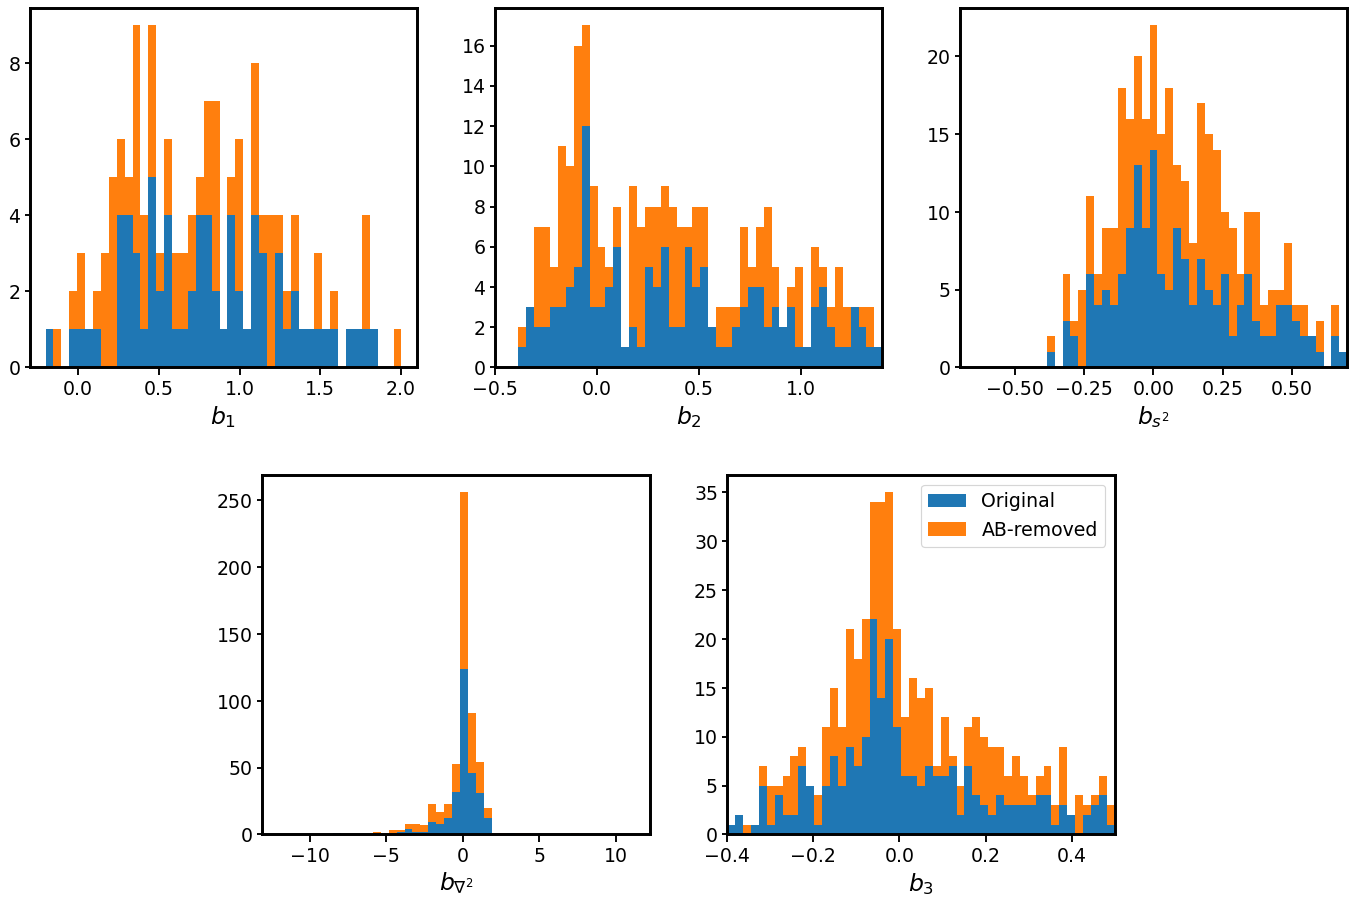

In [11]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', 'Total']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
cmap_patch = [cmap_red, cmap_blue, cmap_total]
colors_cmap_patch = [color_red, color_blue, color_total] 

fig = plt.figure(figsize = (20,9)) 
grid = gridspec.GridSpec(2, 6)
grid.update(wspace = 0.5, hspace = 0.3, bottom = -0.2)
 
ax1 = plt.subplot(grid[0, 0:2])
ax2 = plt.subplot(grid[0, 2:4])
ax3 = plt.subplot(grid[0, 4:6])
ax4 = plt.subplot(grid[1, 1:3])
ax5 = plt.subplot(grid[1, 3:5])
axlist = [ax1, ax2, ax3, ax4, ax5] #https://www.geeksforgeeks.org/matplotlib-gridspec-gridspec-class-in-python/

ylabel = ['$b_1$', '$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
biasval_array, biasval_AB_array = [], []
for i, ylim, ax in zip(range(len(ylabel)), [(-0.3, 2.1), (-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)], axlist):
                
    for color, plot_color, title in zip(['red', 'blue', 'total'], cmap_patch, labels):        

        for density in ['low', 'high', 'medium']:

            for z, j in zip(z_array, range(len(z_array))):

                for marker, hodtype in zip(['o','^'], hodtypes):

                    biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                      density+'.npy')
                    biasval_AB = np.load(home + 'data/AB_mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                      density+'.npy')

                    biasval_array.append(biasval[:,i][k1_idx])
                    biasval_AB_array.append(biasval_AB[:,i][k1_idx])
    
                ax.set_xlim(ylim)

    ax.hist([biasval_array, biasval_AB_array], bins = np.linspace(ylim[0], ylim[1]), stacked = True, label = ['Original', 'AB-removed'])  
    ax.set_xlabel(ylabel[i])

plt.legend()
plt.show()

# Figure 4: Compare TNG vs UM

<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4792/1940694272.py:54: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel(ylabel[i]+'$_\mathrm{, TNG}$')
/tmp/ipykernel_4792/1940694272.py:58: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel(ylabel[i] + '$_\mathrm{, UM}$')


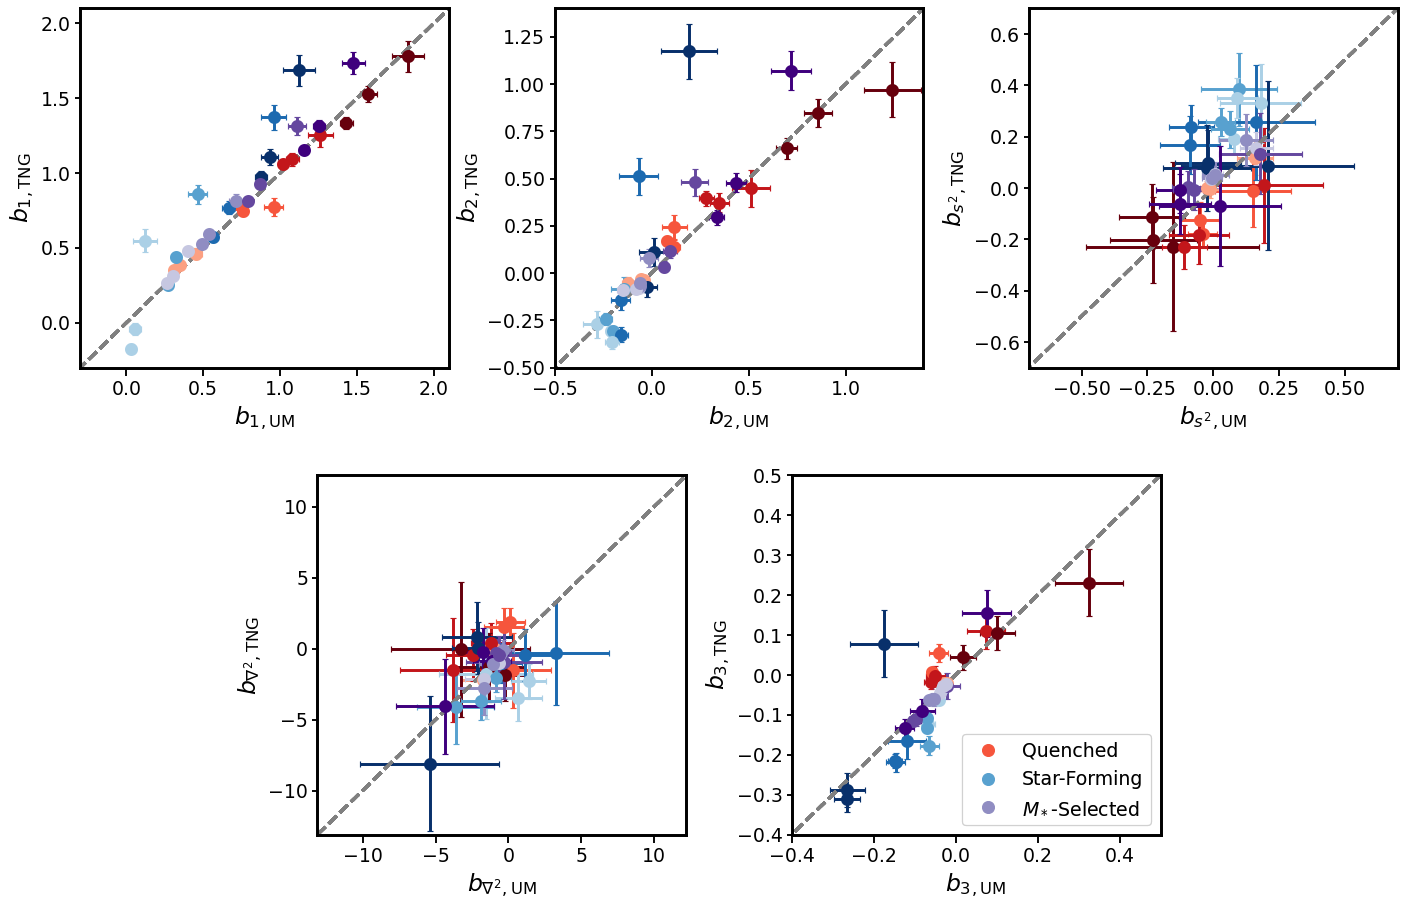

In [12]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', '$M_*$-Selected']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']

z_array = [0, 0.5, 1, 1.5]

cmap_red = plt.get_cmap('Reds')(np.linspace(0.333, 0.999, 4))
cmap_blue = plt.get_cmap('Blues')(np.linspace(0.333, 0.999, 4))
cmap_total = plt.get_cmap('Purples')(np.linspace(0.333, 0.999, 4))
color_red = cmap_red[1] 
color_blue = cmap_blue[1] 
color_total = cmap_total[1] 

cmap_patch = [cmap_red, cmap_blue, cmap_total]
colors_cmap_patch = [color_red, color_blue, color_total] 

fig = plt.figure(figsize = (20,9))
grid = gridspec.GridSpec(2, 6)
grid.update(wspace = 0.8, hspace = 0.3, bottom = -0.2) 
 
ax1 = plt.subplot(grid[0, 0:2])
ax2 = plt.subplot(grid[0, 2:4])
ax3 = plt.subplot(grid[0, 4:6])
ax4 = plt.subplot(grid[1, 1:3])
ax5 = plt.subplot(grid[1, 3:5])
axlist = [ax1, ax2, ax3, ax4, ax5] 

ylabel = ['$b_1$', '$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
line = np.linspace(-13.1, 12.2)
for i, ylim, ax in zip(range(len(ylabel)), [(-0.3, 2.1), (-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)], axlist):
                
    for color, plot_color, title in zip(['red', 'blue', 'total'], cmap_patch, labels):        

        for density in ['low', 'high', 'medium']:

            for z, j in zip(z_array, range(len(z_array))):

                biasval = np.load(home + 'data/mpibiasval_UMhod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')
                biasval_tng = np.load(home + 'data/mpibiasval_TNGhod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')

                # load error bars
                err_x = error('UM', z, color, density)
                err_y = error('TNG', z, color, density)
            
                ax.scatter(biasval[:,i][k1_idx], biasval_tng[:,i][k1_idx], color = plot_color[j], #marker = marker,
                              linewidth = 5, zorder = 3)
                ax.plot(line, line, linewidth = 2.5, linestyle = '--', color = 'grey')
                ax.errorbar(biasval[:,i][k1_idx], biasval_tng[:,i][k1_idx], xerr = err_x[i], yerr = err_y[i], 
                                   color = plot_color[j], fmt = 'none', elinewidth = 2.5, capsize = 2.5)
                
            ax.set_ylabel(ylabel[i]+'$_\mathrm{, TNG}$')
            ax.set_xlim(ylim)
            ax.set_ylim(ylim)
        
    ax.set_xlabel(ylabel[i] + '$_\mathrm{, UM}$')
    
ax.plot(np.linspace(-1,8), np.linspace(-1,8), linestyle = '--', linewidth = 2.5, color = 'grey')
custom_lines = [Line2D([0], [0], color = i, markersize = 10, marker = 'o', linestyle = 'None') for i in colors_cmap_patch]
second_legend = plt.legend(custom_lines, labels, loc = 'lower right')
fig.add_artist(second_legend)

plt.savefig(home + 'figures/Figure4.pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Figure out the outliers

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4792/355291878.py:3: SyntaxWarning: invalid escape sequence '\s'
  labels = ['Quenched', 'Star-Forming', 'M$\star$-Selected']


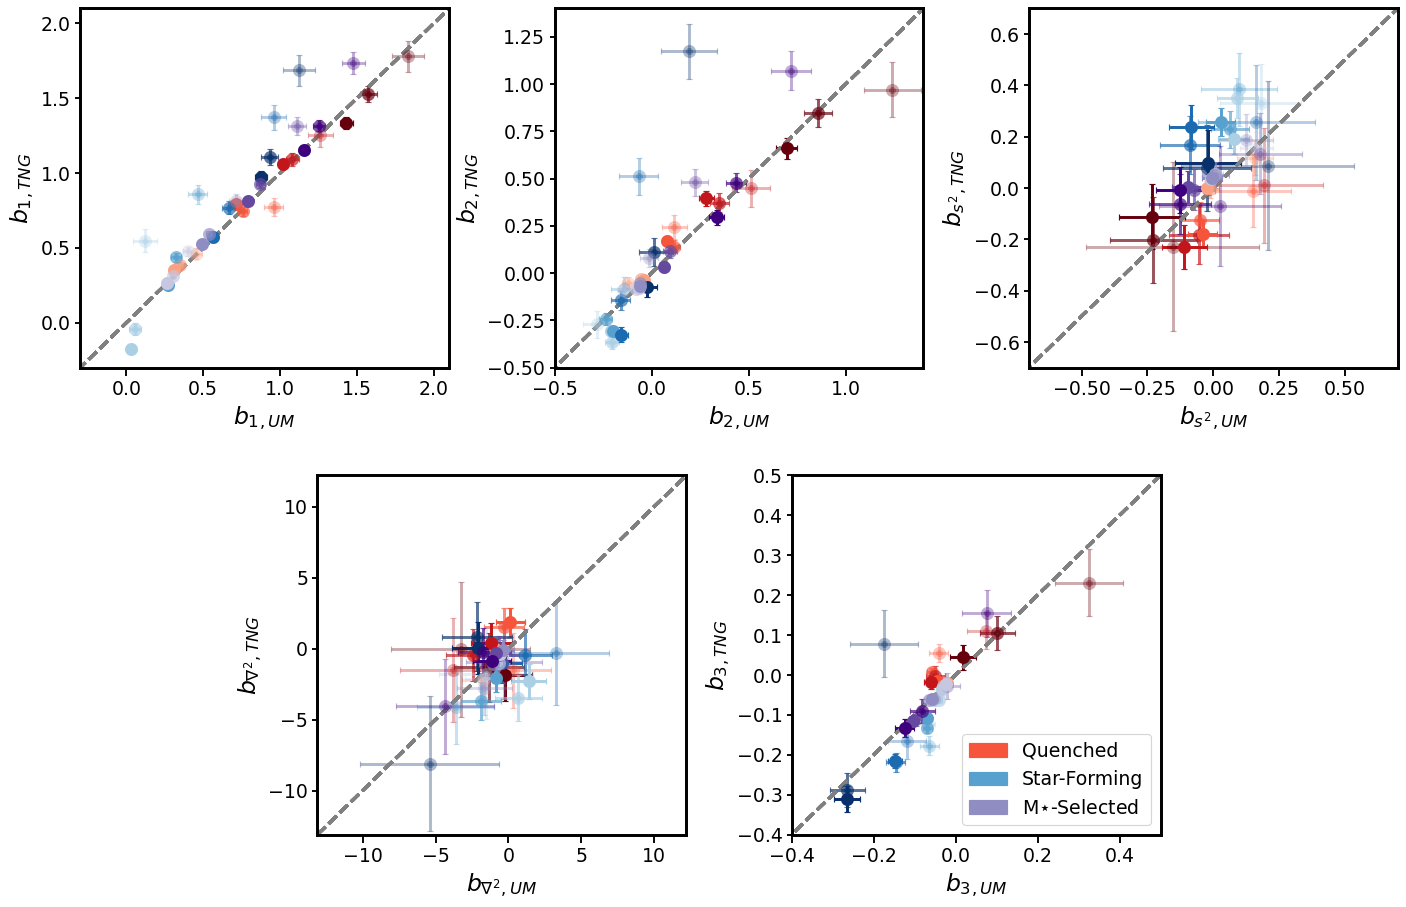

In [13]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', 'M$\star$-Selected']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
cmap_patch = [cmap_red, cmap_blue, cmap_total]
colors_cmap_patch = [color_red, color_blue, color_total] 

fig = plt.figure(figsize = (20,9))
grid = gridspec.GridSpec(2, 6)
grid.update(wspace = 0.8, hspace = 0.3, bottom = -0.2) 
 
ax1 = plt.subplot(grid[0, 0:2])
ax2 = plt.subplot(grid[0, 2:4])
ax3 = plt.subplot(grid[0, 4:6])
ax4 = plt.subplot(grid[1, 1:3])
ax5 = plt.subplot(grid[1, 3:5])
axlist = [ax1, ax2, ax3, ax4, ax5] #https://www.geeksforgeeks.org/matplotlib-gridspec-gridspec-class-in-python/

ylabel = ['$b_1$', '$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
line = np.linspace(-13.1, 12.2) #-10.1, 5.2
for i, ylim, ax in zip(range(len(ylabel)), [(-0.3, 2.1), (-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)], axlist):
                
    for color, plot_color, title in zip(['red', 'blue', 'total'], cmap_patch, labels):        

        for alpha, density in zip([0.33, 0.67, 1],['low', 'medium', 'high']):

            for z, j in zip(z_array, range(len(z_array))):

                biasval = np.load(home + 'data/mpibiasval_UMhod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')
                biasval_tng = np.load(home + 'data/mpibiasval_TNGhod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')

                # load error bars
                err_x = error('UM', z, color, density)
                err_y = error('TNG', z, color, density)
            
                ax.scatter(biasval[:,i][k1_idx], biasval_tng[:,i][k1_idx], color = plot_color[j], 
                              linewidth = 5, zorder = 3, alpha = alpha) 
                ax.plot(line, line, linewidth = 2.5, linestyle = '--', color = 'grey')
                ax.errorbar(biasval[:,i][k1_idx], biasval_tng[:,i][k1_idx], xerr = err_x[i], yerr = err_y[i], 
                                   color = plot_color[j], fmt = 'none', elinewidth = 2.5, capsize = 2.5, alpha = alpha)
                
            ax.set_ylabel(ylabel[i]+'$_{, TNG}$')
            ax.set_xlim(ylim)
            ax.set_ylim(ylim)
        
    ax.set_xlabel(ylabel[i] + '$_{, UM}$')
    
ax.plot(np.linspace(-1,8), np.linspace(-1,8), linestyle = '--', linewidth = 2.5, color = 'grey')
patch = [mpatches.Patch(color=colors_cmap_patch[i], label=labels[i]) for i in range(len(labels))]
first_legend = ax.legend(handles=patch, loc = 'lower right')
        
plt.show()

# Figure 5: Compare original vs AB-removed samples

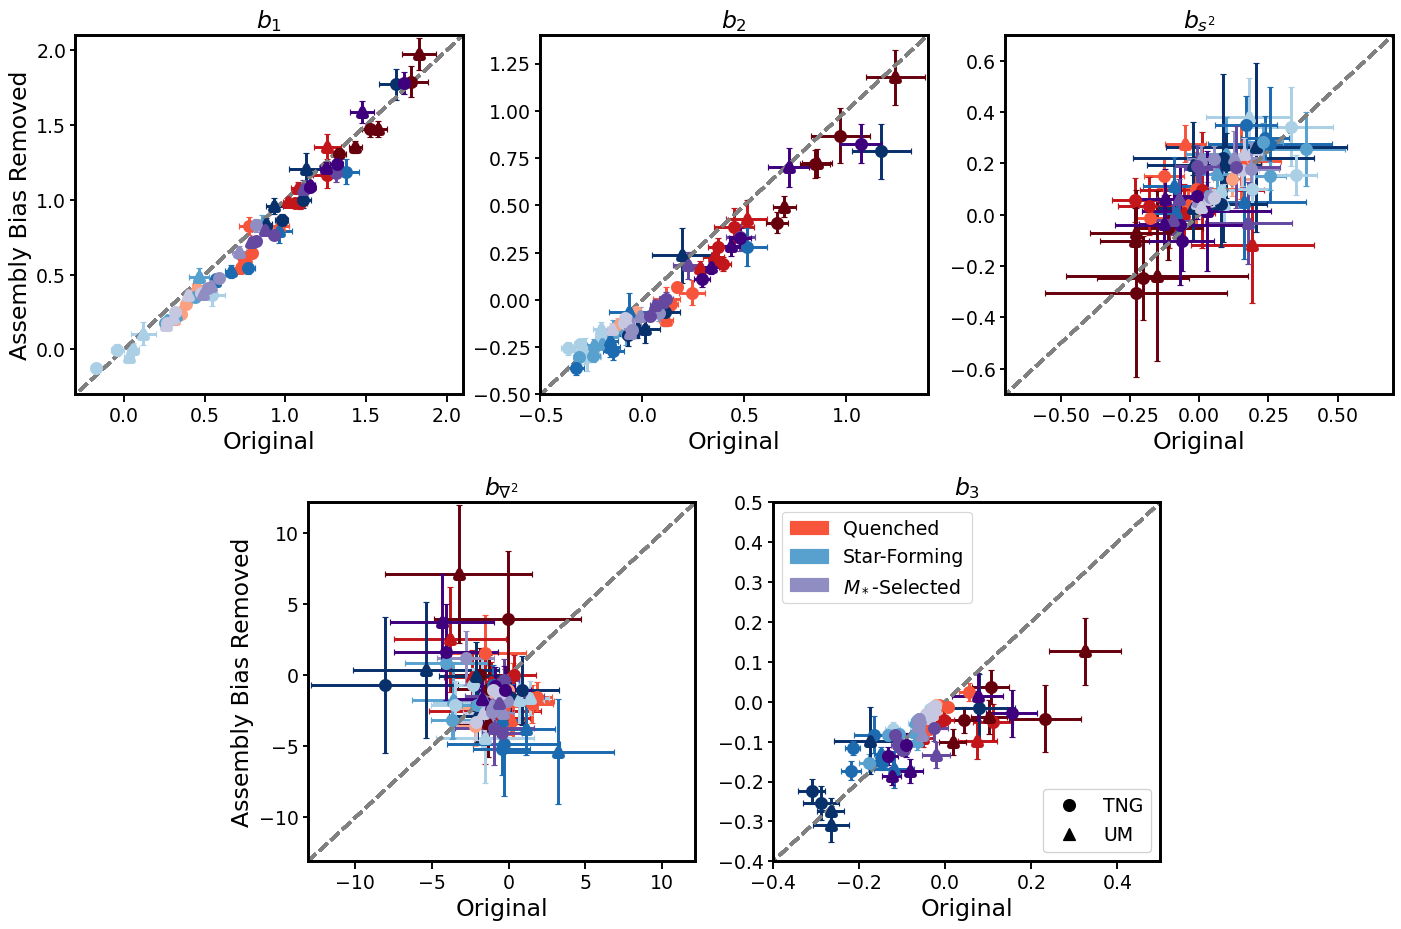

In [14]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', '$M_*$-Selected']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
cmap_patch = [cmap_red, cmap_blue, cmap_total]
colors_cmap_patch = [color_red, color_blue, color_total] 

fig = plt.figure(figsize = (20,9))
grid = gridspec.GridSpec(2, 6) 
grid.update(wspace = 0.5, hspace = 0.3, bottom = -0.2) 
 
ax1 = plt.subplot(grid[0, 0:2])
ax2 = plt.subplot(grid[0, 2:4])
ax3 = plt.subplot(grid[0, 4:6])
ax4 = plt.subplot(grid[1, 1:3])
ax5 = plt.subplot(grid[1, 3:5])
axlist = [ax1, ax2, ax3, ax4, ax5] #https://www.geeksforgeeks.org/matplotlib-gridspec-gridspec-class-in-python/

ylabel = ['$b_1$', '$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
line = np.linspace(-13.1, 12.2) #-10.1, 5.2
for i, ylim, ax in zip(range(len(ylabel)), [(-0.3, 2.1), (-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)], axlist):
                
    for color, plot_color, title in zip(['red', 'blue', 'total'], cmap_patch, labels):        

        for density in ['low', 'high', 'medium']:

            for z, j in zip(z_array, range(len(z_array))):

                for marker, hodtype in zip(['o','^'], hodtypes):

                    biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                      density+'.npy')
                    biasval_AB = np.load(home + 'data/AB_mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                      density+'.npy')
    
                    # load error bars
                    err_x = error(hodtype, z, color, density)
                    err_y = error(hodtype, z, color, density, AB = 'AB_')
                
                    ax.scatter(biasval[:,i][k1_idx], biasval_AB[:,i][k1_idx], color = plot_color[j], zorder = 3, 
                               marker = marker, linewidth = 5) 
                    ax.plot(line, line, linewidth = 2.5, linestyle = '--', color = 'grey')
                    ax.errorbar(biasval[:,i][k1_idx], biasval_AB[:,i][k1_idx], xerr = err_x[i], yerr = err_y[i], 
                                       color = plot_color[j], fmt = 'none', elinewidth = 2.5, capsize = 2.5)
    
                if (i == 0) or (i==3):
                    ax.set_ylabel('Assembly Bias Removed')
                ax.set_xlim(ylim)
                ax.set_ylim(ylim)
                ax.set_title(ylabel[i])
        
    ax.set_xlabel('Original')
    
ax.plot(np.linspace(-1,8), np.linspace(-1,8), linestyle = '--', linewidth = 2.5, color = 'grey')
patch = [mpatches.Patch(color=colors_cmap_patch[i], label=labels[i]) for i in range(len(labels))]
first_legend = ax.legend(handles=patch, loc = 'upper left')
fig.add_artist(first_legend)

custom_lines = [Line2D([0], [0], color = 'black', markersize = 10, marker = 'o', linestyle = 'None'), 
                Line2D([0], [0], color = 'black', markersize = 10, marker = '^', linestyle = 'None')]
second_legend = plt.legend(custom_lines, hodtypes, loc = 'lower right')
fig.add_artist(second_legend)

plt.savefig(home + 'figures/Figure5.pdf', dpi = 300, bbox_inches='tight')
plt.show()